In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [78]:
#Import Health Crime Data
df_CZA = pd.read_csv('../data/CZA.csv')
df_CZB = pd.read_csv('../data/CZB.csv') 
df_CZD = pd.read_csv('../data/CZD.csv') 
df_CZH = pd.read_csv('../data/CZH.csv')
df_CZL = pd.read_csv('../data/CZL.csv') 
df_CZM = pd.read_csv('../data/CZM.csv') 
df_CZO = pd.read_csv('../data/CZO.csv')
df_CZP = pd.read_csv('../data/CZP.csv')
df_CZR = pd.read_csv('../data/CZR.csv')
df_CZS = pd.read_csv('../data/CZS.csv')
df_CZT = pd.read_csv('../data/CZT.csv')
df_CZU = pd.read_csv('../data/CZU.csv')
df_CZV = pd.read_csv('../data/CZV.csv') 

### CZA

In [79]:
#Getting Rid of P and SE Columns, not needed for TS
df_CZA = df_CZA.drop(columns=['p', 'se', 'a'])

In [80]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZA)):
    if len(df_CZA['d'][i]) > 4:
        df_CZA.drop(i, inplace=True)

In [81]:
df_CZA.reset_index(inplace=True)

In [82]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZA)):
    if df_CZA['d'][i] == '2022':
        t_2022 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2021':
        t_2021 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2020':
        t_2020 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2019':
        t_2019 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2018':
        t_2018 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2017':
        t_2017 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2016':
        t_2016 += df_CZA['v'][i]

In [83]:
cza_ts = pd.DataFrame()
cza_ts = df_CZA

In [84]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(cza_ts)):
    if cza_ts['d'][i] == '2022':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2021':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2020':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2019':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2018':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2017':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2016':
        cza_ts.drop(i, inplace=True)

In [85]:
cza_ts.head()

,index,Unnamed: 0,g,l,d,v
5731,9613,0,1714000,place,2015,13094.0
5732,10550,0,1714000,place,2014,12532.0
5733,11487,0,1714000,place,2013,12117.0
5734,12424,0,1714000,place,2012,12277.0
5735,13361,0,1714000,place,2011,12409.0


In [86]:
df_CZA['d'].value_counts()

2015    1
1999    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1997    1
1998    1
2000    1
2014    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    1
2013    1
1985    1
Name: d, dtype: int64

In [87]:
cza_ts.drop(columns=['index', 'g', 'l'], inplace=True)

In [88]:
cza_ts.head()

,Unnamed: 0,d,v
5731,0,2015,13094.0
5732,0,2014,12532.0
5733,0,2013,12117.0
5734,0,2012,12277.0
5735,0,2011,12409.0


In [89]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [90]:
cza_ts = cza_ts.append(row_2016, ignore_index=True)
cza_ts = cza_ts.append(row_2017, ignore_index=True)
cza_ts = cza_ts.append(row_2018, ignore_index=True)
cza_ts = cza_ts.append(row_2019, ignore_index=True)
cza_ts = cza_ts.append(row_2020, ignore_index=True)
cza_ts = cza_ts.append(row_2021, ignore_index=True)
cza_ts = cza_ts.append(row_2022, ignore_index=True)

C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\1562274710.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cza_ts = cza_ts.append(row_2016, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\1562274710.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cza_ts = cza_ts.append(row_2017, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\1562274710.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cza_ts = cza_ts.append(row_2018, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\1562274710.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cza_

In [91]:
#Convert date to datetime
cza_ts['d'] = pd.to_datetime(cza_ts['d'])

In [92]:
cza_ts.set_index('d', inplace = True)

In [93]:
cza_ts.sort_index(inplace=True)
cza_ts.head()

,Unnamed: 0,v
d,,
1985-01-01,0.0,29104.0
1986-01-01,0.0,33537.0
1987-01-01,0.0,34180.0
1988-01-01,0.0,35994.0
1989-01-01,0.0,37621.0


In [94]:
cza_ts['v_a'] = cza_ts['v']
cza_ts.drop(columns='v', inplace=True)

In [95]:
# Function called plot_series that takes in 
# a dataframe, a list of column names to plot, the 
# plot title and the axis labels as arguments,
# then displays the line plot with a figure size
# of 18 horizontal inches by 9 vertical inches.

# Matthew Garton - BOS

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

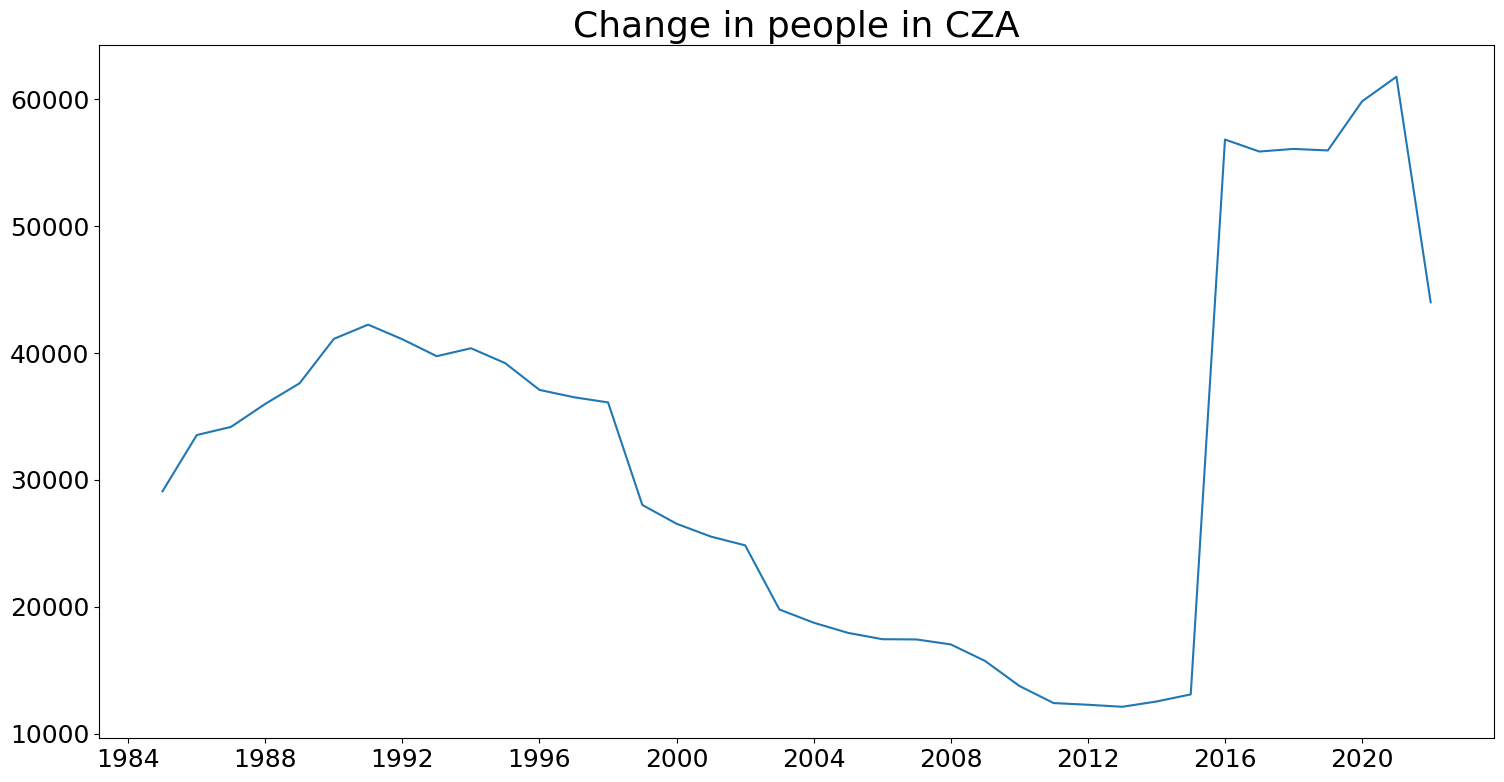

In [96]:
plot_series(cza_ts, cols=['v_a'], title = 'Change in people in CZA') 

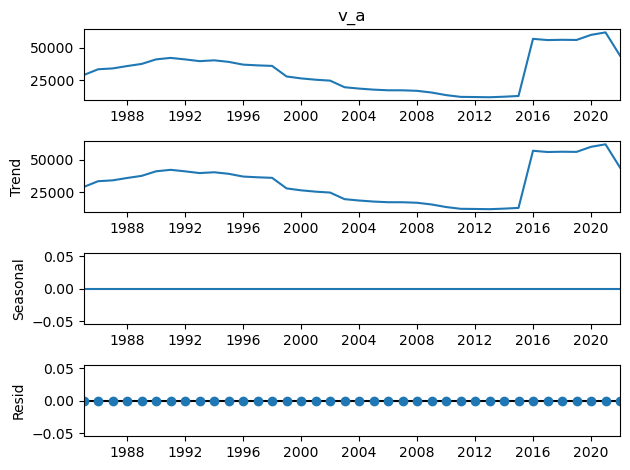

In [97]:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(cza_ts['v_a'])

# Plot the decomposed time series.
decomp.plot();


In [98]:
# Generate a dataframe with our CO2 data that
# looks like the above dataframe.

#cza_ts['CZA_lag_1'] = cza_ts['v_a'].shift(1)
#cza_ts['CZA_lag_2'] = cza_ts['v_a'].shift(2)
#cza_ts['CZA_lag_3'] = cza_ts['v_a'].shift(3)

In [99]:
#cza_ts.corr()

In [100]:
#ACF Plot
#plot_acf(cza_ts['v_a'], lags=20);

In [101]:
# Import the partial autocorrelation function (PACF) plot.
#from statsmodels.graphics.tsaplots import plot_pacf

In [102]:
#PCAF Plot

#plot_pacf(cza_ts['v_a'], lags=15);

### CZB

In [103]:
df_CZB.head()

,Unnamed: 0,se,g,l,a,p,d,v
0,0,NaN,60601,zip,CZB,NaN,2018-2022,34.320927
1,1,NaN,60602,zip,CZB,NaN,2018-2022,5.314324
2,2,NaN,60603,zip,CZB,NaN,2018-2022,6.323168
3,3,NaN,60604,zip,CZB,NaN,2018-2022,4.485415
4,4,NaN,60606,zip,CZB,NaN,2018-2022,16.307285


In [104]:
df_CZB = df_CZB.drop(columns=['p', 'se', 'g', 'l', 'a'])

In [105]:
df_CZB.head()

,Unnamed: 0,d,v
0,0,2018-2022,34.320927
1,1,2018-2022,5.314324
2,2,2018-2022,6.323168
3,3,2018-2022,4.485415
4,4,2018-2022,16.307285


In [106]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZB)):
    if len(df_CZB['d'][i]) > 4:
        df_CZB.drop(i, inplace=True)

In [107]:
df_CZB.reset_index(inplace=True)

In [108]:
df_CZB['d'].value_counts()

2020    935
2019    935
2018    935
2017    935
2016    935
2021    915
2022    136
1993      1
1998      1
1997      1
1996      1
1995      1
1994      1
1990      1
1992      1
1991      1
2000      1
1989      1
1988      1
1987      1
1986      1
1999      1
2003      1
2001      1
2002      1
2004      1
2005      1
2006      1
2007      1
2008      1
2009      1
2010      1
2011      1
2012      1
2013      1
2014      1
2015      1
1985      1
Name: d, dtype: int64

In [109]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZB)):
    if df_CZB['d'][i] == '2022':
        t_2022 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2021':
        t_2021 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2020':
        t_2020 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2019':
        t_2019 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2018':
        t_2018 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2017':
        t_2017 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2016':
        t_2016 += df_CZB['v'][i]

In [110]:
czb_ts = pd.DataFrame()
czb_ts = df_CZB

In [111]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czb_ts)):
    if czb_ts['d'][i] == '2022':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2021':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2020':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2019':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2018':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2017':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2016':
        czb_ts.drop(i, inplace=True)

In [112]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [113]:
czb_ts = czb_ts.append(row_2016, ignore_index=True)
czb_ts = czb_ts.append(row_2017, ignore_index=True)
czb_ts = czb_ts.append(row_2018, ignore_index=True)
czb_ts = czb_ts.append(row_2019, ignore_index=True)
czb_ts = czb_ts.append(row_2020, ignore_index=True)
czb_ts = czb_ts.append(row_2021, ignore_index=True)
czb_ts = czb_ts.append(row_2022, ignore_index=True)

C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\965943007.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czb_ts = czb_ts.append(row_2016, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\965943007.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czb_ts = czb_ts.append(row_2017, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\965943007.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czb_ts = czb_ts.append(row_2018, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\965943007.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czb_ts =

In [114]:
#Convert date to datetime
czb_ts['d'] = pd.to_datetime(czb_ts['d'])

In [115]:
czb_ts.set_index('d', inplace = True)

In [116]:
czb_ts.sort_index(inplace=True)

In [117]:
czb_ts.drop(columns=['index'], inplace=True)

In [118]:
czb_ts['v_b'] = czb_ts['v']
czb_ts.drop(columns='v', inplace=True)

In [119]:
czb_ts.head()

,Unnamed: 0,v_b
d,,
1985-01-01,0.0,52677.0
1986-01-01,0.0,56299.0
1987-01-01,0.0,50950.0
1988-01-01,0.0,52097.0
1989-01-01,0.0,51625.0


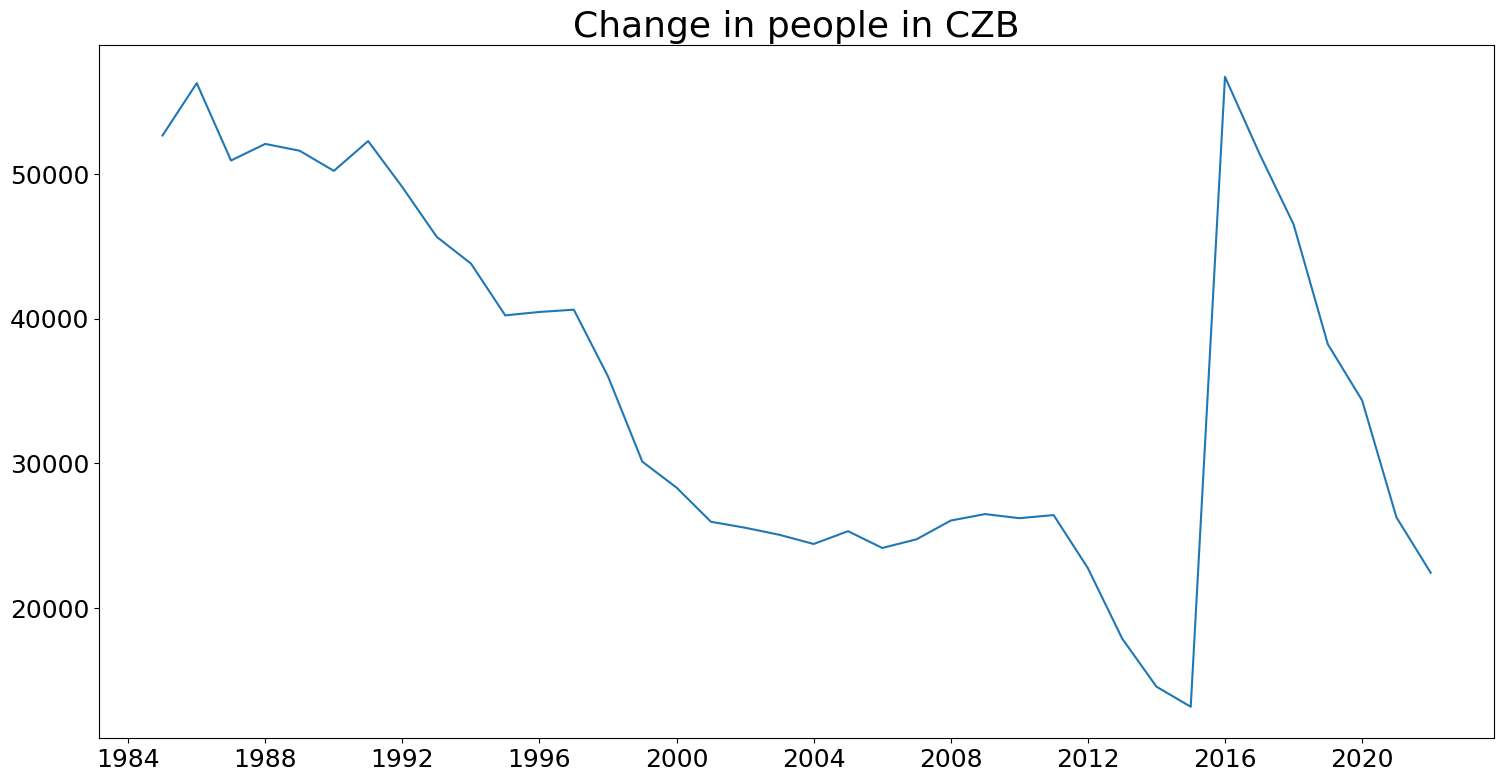

In [120]:
plot_series(czb_ts, cols=['v_b'], title = 'Change in people in CZB') 

### CZD

In [121]:
df_CZD.head()

,Unnamed: 0,se,g,l,a,p,d,v
0,0,NaN,60601,zip,CZD,NaN,2018-2022,24.634871
1,1,NaN,60602,zip,CZD,NaN,2018-2022,4.378444
2,2,NaN,60603,zip,CZD,NaN,2018-2022,3.745708
3,3,NaN,60604,zip,CZD,NaN,2018-2022,2.683766
4,4,NaN,60606,zip,CZD,NaN,2018-2022,9.396802


In [122]:
#Getting Rid of P and SE Columns, not needed for TS
df_CZD = df_CZD.drop(columns=['p', 'se', 'a'])

In [123]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZD)):
    if len(df_CZD['d'][i]) > 4:
        df_CZD.drop(i, inplace=True)

In [124]:
df_CZD.reset_index(inplace=True)

In [125]:
df_CZD['d'].value_counts()

2020    935
2019    935
2018    935
2017    935
2016    935
2021    738
2022    136
Name: d, dtype: int64

In [126]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZD)):
    if df_CZD['d'][i] == '2022':
        t_2022 += df_CZD['v'][i]
    elif df_CZD['d'][i] == '2021':
        t_2021 += df_CZD['v'][i]
    elif df_CZD['d'][i] == '2020':
        t_2020 += df_CZD['v'][i]
    elif df_CZD['d'][i] == '2019':
        t_2019 += df_CZD['v'][i]
    elif df_CZD['d'][i] == '2018':
        t_2018 += df_CZD['v'][i]
    elif df_CZD['d'][i] == '2017':
        t_2017 += df_CZD['v'][i]
    elif df_CZD['d'][i] == '2016':
        t_2016 += df_CZD['v'][i]

In [127]:
czd_ts = pd.DataFrame()
czd_ts = df_CZD

In [128]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czd_ts)):
    if czd_ts['d'][i] == '2022':
        czd_ts.drop(i, inplace=True)
    elif czd_ts['d'][i] == '2021':
        czd_ts.drop(i, inplace=True)
    elif czd_ts['d'][i] == '2020':
        czd_ts.drop(i, inplace=True)
    elif czd_ts['d'][i] == '2019':
        czd_ts.drop(i, inplace=True)
    elif czd_ts['d'][i] == '2018':
        czd_ts.drop(i, inplace=True)
    elif czd_ts['d'][i] == '2017':
        czd_ts.drop(i, inplace=True)
    elif czd_ts['d'][i] == '2016':
        czd_ts.drop(i, inplace=True)

In [129]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [130]:
czd_ts = czd_ts.append(row_2016, ignore_index=True)
czd_ts = czd_ts.append(row_2017, ignore_index=True)
czd_ts = czd_ts.append(row_2018, ignore_index=True)
czd_ts = czd_ts.append(row_2019, ignore_index=True)
czd_ts = czd_ts.append(row_2020, ignore_index=True)
czd_ts = czd_ts.append(row_2021, ignore_index=True)
czd_ts = czd_ts.append(row_2022, ignore_index=True)

C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\486695826.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czd_ts = czd_ts.append(row_2016, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\486695826.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czd_ts = czd_ts.append(row_2017, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\486695826.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czd_ts = czd_ts.append(row_2018, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\486695826.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czd_ts =

In [131]:
#Convert date to datetime
czd_ts['d'] = pd.to_datetime(czd_ts['d'])

In [132]:
czd_ts.set_index('d', inplace = True)

In [133]:
czd_ts.sort_index(inplace=True)

In [134]:
czd_ts.drop(columns=['index'], inplace=True)

In [135]:
czd_ts.drop(columns=['g', 'l'], inplace=True)

In [136]:
czd_ts['v_d'] = czd_ts['v']
czd_ts.drop(columns='v', inplace=True)

In [137]:
czd_ts.head()

,Unnamed: 0,v_d
d,,
2016-01-01,NaN,52545.573634
2017-01-01,NaN,45632.077699
2018-01-01,NaN,50942.174659
2019-01-01,NaN,59623.732156
2020-01-01,NaN,28844.104876


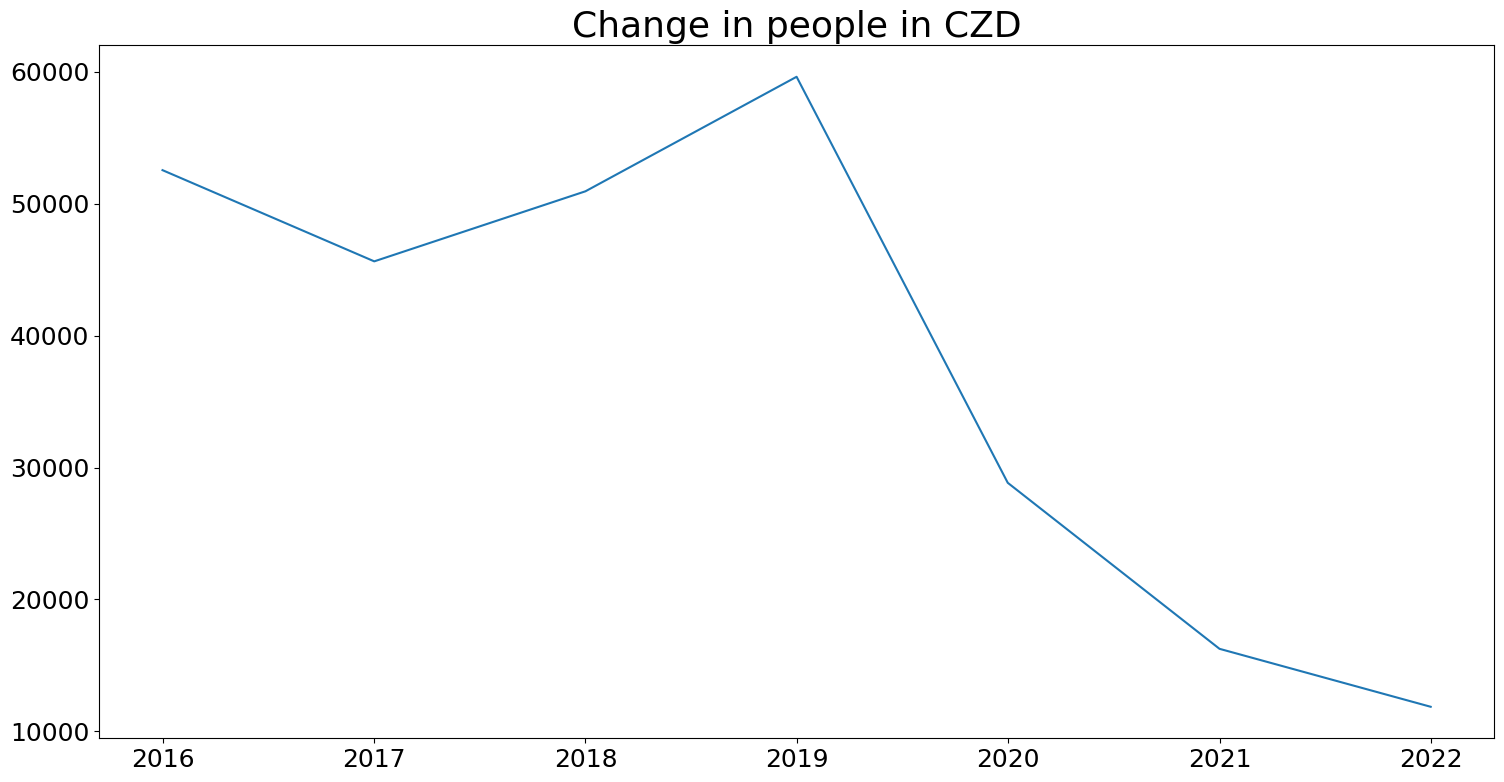

In [138]:
plot_series(czd_ts, cols=['v_d'], title = 'Change in people in CZD') 

### CZH

In [139]:
df_CZH = df_CZH.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZH.head()

,Unnamed: 0,d,v
0,0,2018-2022,2.668703
1,1,2018-2022,0.329276
2,2,2018-2022,0.676879
3,3,2018-2022,0.461857
4,4,2018-2022,0.900524


In [140]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZH)):
    if len(df_CZH['d'][i]) > 4:
        df_CZH.drop(i, inplace=True)

In [141]:
df_CZH.reset_index(inplace=True)

In [142]:
df_CZH['d'].value_counts()

2020    935
2019    935
2018    935
2017    935
2016    935
2021    498
2022    127
1993      1
1998      1
1997      1
1996      1
1995      1
1994      1
1990      1
1992      1
1991      1
2000      1
1989      1
1988      1
1987      1
1986      1
1999      1
2003      1
2001      1
2002      1
2004      1
2005      1
2006      1
2007      1
2008      1
2009      1
2010      1
2011      1
2012      1
2013      1
2014      1
2015      1
1985      1
Name: d, dtype: int64

In [143]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZH)):
    if df_CZH['d'][i] == '2022':
        t_2022 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2021':
        t_2021 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2020':
        t_2020 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2019':
        t_2019 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2018':
        t_2018 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2017':
        t_2017 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2016':
        t_2016 += df_CZH['v'][i]

In [144]:
czh_ts = pd.DataFrame()
czh_ts = df_CZH

In [145]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czh_ts)):
    if czh_ts['d'][i] == '2022':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2021':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2020':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2019':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2018':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2017':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2016':
        czh_ts.drop(i, inplace=True)

In [146]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [147]:
czh_ts = czh_ts.append(row_2016, ignore_index=True)
czh_ts = czh_ts.append(row_2017, ignore_index=True)
czh_ts = czh_ts.append(row_2018, ignore_index=True)
czh_ts = czh_ts.append(row_2019, ignore_index=True)
czh_ts = czh_ts.append(row_2020, ignore_index=True)
czh_ts = czh_ts.append(row_2021, ignore_index=True)
czh_ts = czh_ts.append(row_2022, ignore_index=True)

C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\3731378244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czh_ts = czh_ts.append(row_2016, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\3731378244.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czh_ts = czh_ts.append(row_2017, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\3731378244.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czh_ts = czh_ts.append(row_2018, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\3731378244.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czh_

In [148]:
#Convert date to datetime
czh_ts['d'] = pd.to_datetime(czh_ts['d'])

In [149]:
czh_ts.set_index('d', inplace = True)
czh_ts.sort_index(inplace=True)
czh_ts.drop(columns=['index'], inplace=True)
czh_ts['v_h'] = czh_ts['v']
czh_ts.drop(columns='v', inplace=True)
czh_ts.head()

,Unnamed: 0,v_h
d,,
1985-01-01,0.0,666.0
1986-01-01,0.0,744.0
1987-01-01,0.0,687.0
1988-01-01,0.0,660.0
1989-01-01,0.0,742.0


In [150]:
plot_series(czh_ts, cols=['v'], title = 'Change in people in CZH') 

KeyError: 'v'

<Figure size 1800x900 with 0 Axes>

### CZL

In [151]:
df_CZL = df_CZL.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZL.head()

,Unnamed: 0,d,v
0,0,2018-2022,1479.192448
1,1,2018-2022,243.253990
2,2,2018-2022,179.016338
3,3,2018-2022,127.984247
4,4,2018-2022,430.360853


In [152]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZL)):
    if len(df_CZL['d'][i]) > 4:
        df_CZL.drop(i, inplace=True)

In [153]:
df_CZL.reset_index(inplace=True)
df_CZL['d'].value_counts()

2021    937
2020    935
2019    935
2018    935
2017    935
2016    935
2022    136
1993      1
1998      1
1997      1
1996      1
1995      1
1994      1
1990      1
1992      1
1991      1
2000      1
1989      1
1988      1
1987      1
1986      1
1999      1
2003      1
2001      1
2002      1
2004      1
2005      1
2006      1
2007      1
2008      1
2009      1
2010      1
2011      1
2012      1
2013      1
2014      1
2015      1
1985      1
Name: d, dtype: int64

In [154]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZL)):
    if df_CZL['d'][i] == '2022':
        t_2022 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2021':
        t_2021 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2020':
        t_2020 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2019':
        t_2019 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2018':
        t_2018 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2017':
        t_2017 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2016':
        t_2016 += df_CZL['v'][i]

In [155]:
czl_ts = pd.DataFrame()
czl_ts = df_CZL

In [156]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czl_ts)):
    if czl_ts['d'][i] == '2022':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2021':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2020':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2019':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2018':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2017':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2016':
        czl_ts.drop(i, inplace=True)

In [157]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [158]:
czl_ts = czl_ts.append(row_2016, ignore_index=True)
czl_ts = czl_ts.append(row_2017, ignore_index=True)
czl_ts = czl_ts.append(row_2018, ignore_index=True)
czl_ts = czl_ts.append(row_2019, ignore_index=True)
czl_ts = czl_ts.append(row_2020, ignore_index=True)
czl_ts = czl_ts.append(row_2021, ignore_index=True)
czl_ts = czl_ts.append(row_2022, ignore_index=True)

C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\4157697202.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czl_ts = czl_ts.append(row_2016, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\4157697202.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czl_ts = czl_ts.append(row_2017, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\4157697202.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czl_ts = czl_ts.append(row_2018, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\4157697202.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czl_

In [159]:
#Convert date to datetime
czl_ts['d'] = pd.to_datetime(czl_ts['d'])

In [160]:
czl_ts.set_index('d', inplace = True)
czl_ts.sort_index(inplace=True)
czl_ts.drop(columns=['index'], inplace=True)
czl_ts['v_l'] = czl_ts['v']
czl_ts.drop(columns='v', inplace=True)
czl_ts.head()

,Unnamed: 0,v_l
d,,
1985-01-01,0.0,122389.0
1986-01-01,0.0,122819.0
1987-01-01,0.0,119926.0
1988-01-01,0.0,129484.0
1989-01-01,0.0,131311.0


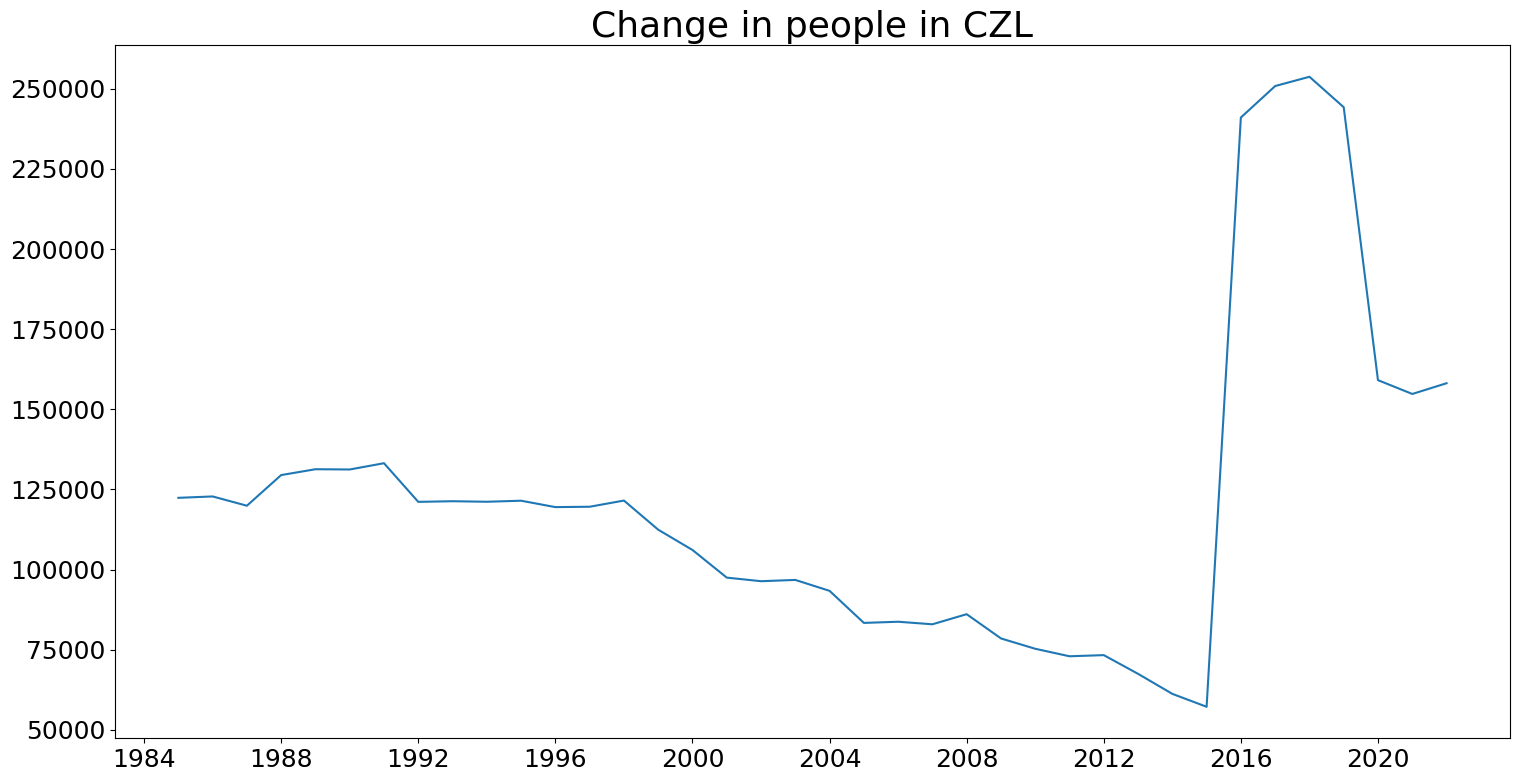

In [161]:
plot_series(czl_ts, cols=['v_l'], title = 'Change in people in CZL') 

In [190]:
# HCSBHP as an example

df_HCSBHP = pd.read_csv('../data/HCSBHP.csv')
df_HCSBHP = df_HCSBHP.loc[(df_HCSBHP['p'].isnull()) \
                          & (df_HCSBHP['g'] == '1714000'),['d','v']]
df_HCSBHP = df_HCSBHP[df_HCSBHP['d'].str.len() == 4]

### CZM (Coming Back to this, not enough data?)

In [162]:
df_CZM = df_CZM.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZM.head()

,Unnamed: 0,d,v
0,0,2018-2022,1736.695116
1,1,2018-2022,282.027337
2,2,2018-2022,222.275814
3,3,2018-2022,158.659473
4,4,2018-2022,529.728256


In [163]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZM)):
    if len(df_CZM['d'][i]) > 4:
        df_CZM.drop(i, inplace=True)

In [164]:
df_CZM.reset_index(inplace=True)
df_CZM['d'].value_counts()

2021    937
2020    877
2019    877
2018    877
2017    877
2016    877
2022    136
Name: d, dtype: int64

In [165]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZM)):
    if df_CZM['d'][i] == '2022':
        t_2022 += df_CZM['v'][i]
    elif df_CZM['d'][i] == '2021':
        t_2021 += df_CZM['v'][i]
    elif df_CZM['d'][i] == '2020':
        t_2020 += df_CZM['v'][i]
    elif df_CZM['d'][i] == '2019':
        t_2019 += df_CZM['v'][i]
    elif df_CZM['d'][i] == '2018':
        t_2018 += df_CZM['v'][i]
    elif df_CZM['d'][i] == '2017':
        t_2017 += df_CZM['v'][i]
    elif df_CZM['d'][i] == '2016':
        t_2016 += df_CZM['v'][i]

In [166]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [167]:
czm_ts = pd.DataFrame()
czm_ts = df_CZM

In [168]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czm_ts)):
    if czm_ts['d'][i] == '2022':
        czm_ts.drop(i, inplace=True)
    elif czm_ts['d'][i] == '2021':
        czm_ts.drop(i, inplace=True)
    elif czm_ts['d'][i] == '2020':
        czm_ts.drop(i, inplace=True)
    elif czm_ts['d'][i] == '2019':
        czm_ts.drop(i, inplace=True)
    elif czm_ts['d'][i] == '2018':
        czm_ts.drop(i, inplace=True)
    elif czm_ts['d'][i] == '2017':
        czm_ts.drop(i, inplace=True)
    elif czm_ts['d'][i] == '2016':
        czm_ts.drop(i, inplace=True)

In [169]:
czm_ts = czm_ts.append(row_2016, ignore_index=True)
czm_ts = czm_ts.append(row_2017, ignore_index=True)
czm_ts = czm_ts.append(row_2018, ignore_index=True)
czm_ts = czm_ts.append(row_2019, ignore_index=True)
czm_ts = czm_ts.append(row_2020, ignore_index=True)
czm_ts = czm_ts.append(row_2021, ignore_index=True)
czm_ts = czm_ts.append(row_2022, ignore_index=True)

C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\814365260.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czm_ts = czm_ts.append(row_2016, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\814365260.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czm_ts = czm_ts.append(row_2017, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\814365260.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czm_ts = czm_ts.append(row_2018, ignore_index=True)
C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_6096\814365260.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czm_ts =

In [ ]:
#Convert date to datetime
czm_ts['d'] = pd.to_datetime(czm_ts['d'])

In [ ]:
czm_ts.set_index('d', inplace = True)
czm_ts.sort_index(inplace=True)
czm_ts['v_m'] = czm_ts['v']
czm_ts.drop(columns='v', inplace=True)

In [ ]:
czm_ts.head()

In [ ]:
plot_series(czm_ts, cols=['v_m'], title = 'Change in people in CZM') 

### CZO

In [ ]:
df_CZO = df_CZO.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZO.head()

In [ ]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZO)):
    if len(df_CZO['d'][i]) > 4:
        df_CZO.drop(i, inplace=True)

In [ ]:
df_CZO.reset_index(inplace=True)
df_CZO.drop(columns='index', inplace=True)

In [ ]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZO)):
    if df_CZO['d'][i] == '2022':
        t_2022 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2021':
        t_2021 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2020':
        t_2020 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2019':
        t_2019 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2018':
        t_2018 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2017':
        t_2017 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2016':
        t_2016 += df_CZO['v'][i]

In [ ]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [ ]:
czo_ts = pd.DataFrame()
czo_ts = df_CZO

In [ ]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czo_ts)):
    if czo_ts['d'][i] == '2022':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2021':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2020':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2019':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2018':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2017':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2016':
        czo_ts.drop(i, inplace=True)

In [ ]:
czo_ts = czo_ts.append(row_2016, ignore_index=True)
czo_ts = czo_ts.append(row_2017, ignore_index=True)
czo_ts = czo_ts.append(row_2018, ignore_index=True)
czo_ts = czo_ts.append(row_2019, ignore_index=True)
czo_ts = czo_ts.append(row_2020, ignore_index=True)
czo_ts = czo_ts.append(row_2021, ignore_index=True)
czo_ts = czo_ts.append(row_2022, ignore_index=True)

In [ ]:
#Convert date to datetime
czo_ts['d'] = pd.to_datetime(czo_ts['d'])

In [ ]:
czo_ts.set_index('d', inplace = True)
czo_ts.sort_index(inplace=True)

In [ ]:
czo_ts['v_o'] = czo_ts['v']
czo_ts.drop(columns='v', inplace=True)

In [ ]:
czo_ts.head()

In [ ]:
plot_series(czo_ts, cols=['v_o'], title = 'Change in people in CZO') 

### CZP

In [ ]:
df_CZP = df_CZP.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZP.head()

In [ ]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZP)):
    if len(df_CZP['d'][i]) > 4:
        df_CZP.drop(i, inplace=True)

In [ ]:
df_CZP.reset_index(inplace=True)
df_CZP.drop(columns='index', inplace=True)

In [ ]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZP)):
    if df_CZP['d'][i] == '2022':
        t_2022 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2021':
        t_2021 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2020':
        t_2020 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2019':
        t_2019 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2018':
        t_2018 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2017':
        t_2017 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2016':
        t_2016 += df_CZP['v'][i]

In [ ]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [ ]:
czp_ts = pd.DataFrame()
czp_ts = df_CZP

In [ ]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czp_ts)):
    if czp_ts['d'][i] == '2022':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2021':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2020':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2019':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2018':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2017':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2016':
        czp_ts.drop(i, inplace=True)

In [ ]:
czp_ts = czp_ts.append(row_2016, ignore_index=True)
czp_ts = czp_ts.append(row_2017, ignore_index=True)
czp_ts = czp_ts.append(row_2018, ignore_index=True)
czp_ts = czp_ts.append(row_2019, ignore_index=True)
czp_ts = czp_ts.append(row_2020, ignore_index=True)
czp_ts = czp_ts.append(row_2021, ignore_index=True)
czp_ts = czp_ts.append(row_2022, ignore_index=True)

In [ ]:
#Convert date to datetime
czp_ts['d'] = pd.to_datetime(czp_ts['d'])

In [ ]:
czp_ts.set_index('d', inplace = True)
czp_ts.sort_index(inplace=True)

In [ ]:
czp_ts['v_p'] = czp_ts['v']
czp_ts.drop(columns='v', inplace=True)

In [ ]:
czp_ts.head()

In [ ]:
plot_series(czp_ts, cols=['v_p'], title = 'Change in people in CZP') 

### CZR

In [ ]:
df_CZR = df_CZR.drop(columns=['p', 'se', 'g', 'l', 'a'])

In [ ]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZR)):
    if len(df_CZR['d'][i]) > 4:
        df_CZR.drop(i, inplace=True)

In [ ]:
df_CZR.reset_index(inplace=True)
df_CZR.drop(columns='index', inplace=True)

In [ ]:
df_CZR.head()

In [ ]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZR)):
    if df_CZR['d'][i] == '2022':
        t_2022 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2021':
        t_2021 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2020':
        t_2020 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2019':
        t_2019 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2018':
        t_2018 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2017':
        t_2017 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2016':
        t_2016 += df_CZR['v'][i]

In [ ]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [ ]:
czr_ts = pd.DataFrame()
czr_ts = df_CZR

In [ ]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czr_ts)):
    if czr_ts['d'][i] == '2022':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2021':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2020':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2019':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2018':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2017':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2016':
        czr_ts.drop(i, inplace=True)

In [ ]:
czr_ts = czr_ts.append(row_2016, ignore_index=True)
czr_ts = czr_ts.append(row_2017, ignore_index=True)
czr_ts = czr_ts.append(row_2018, ignore_index=True)
czr_ts = czr_ts.append(row_2019, ignore_index=True)
czr_ts = czr_ts.append(row_2020, ignore_index=True)
czr_ts = czr_ts.append(row_2021, ignore_index=True)
czr_ts = czr_ts.append(row_2022, ignore_index=True)

In [ ]:
#Convert date to datetime
czr_ts['d'] = pd.to_datetime(czr_ts['d'])
czr_ts.head()

In [ ]:
czr_ts.set_index('d', inplace = True)
czr_ts.sort_index(inplace=True)
czr_ts['v_r'] = czr_ts['v']
czr_ts.drop(columns='v', inplace=True)

In [ ]:
czr_ts.head()

In [ ]:
plot_series(czr_ts, cols=['v_r'], title = 'Change in people in CZR') 

### CZS

In [ ]:
df_CZS = df_CZS.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZS.head()

In [ ]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZS)):
    if len(df_CZS['d'][i]) > 4:
        df_CZS.drop(i, inplace=True)

In [ ]:
df_CZS['d'].value_counts()

In [ ]:
df_CZS.reset_index(inplace=True)
df_CZS.drop(columns='index', inplace=True)

In [ ]:
df_CZS.head()

In [ ]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZS)):
    if df_CZS['d'][i] == '2022':
        t_2022 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2021':
        t_2021 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2020':
        t_2020 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2019':
        t_2019 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2018':
        t_2018 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2017':
        t_2017 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2016':
        t_2016 += df_CZS['v'][i]

In [ ]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [ ]:
czs_ts = pd.DataFrame()
czs_ts = df_CZS

In [ ]:
czs_ts.set_index('d', inplace = True)
czs_ts.sort_index(inplace=True)
czs_ts['v_s'] = czs_ts['v']
czs_ts.drop(columns='v', inplace=True)

In [ ]:
czs_ts.head()

In [ ]:
plot_series(czs_ts, cols=['v_s'], title = 'Change in people in CZS') 

### CZT

In [ ]:
df_CZT = df_CZT.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZT.head()

In [ ]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZT)):
    if len(df_CZT['d'][i]) > 4:
        df_CZT.drop(i, inplace=True)

In [ ]:
df_CZT.reset_index(inplace=True)
df_CZT.drop(columns='index', inplace=True)

In [ ]:
df_CZT.head()

In [ ]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZT)):
    if df_CZT['d'][i] == '2022':
        t_2022 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2021':
        t_2021 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2020':
        t_2020 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2019':
        t_2019 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2018':
        t_2018 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2017':
        t_2017 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2016':
        t_2016 += df_CZT['v'][i]

In [ ]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [ ]:
czt_ts = pd.DataFrame()
czt_ts = df_CZT

In [ ]:
czt_ts.set_index('d', inplace = True)
czt_ts.sort_index(inplace= True)
czt_ts['v_t'] = czt_ts['v']
czt_ts.drop(columns='v', inplace=True)

In [ ]:
czt_ts.head()

In [ ]:
plot_series(czt_ts, cols=['v_t'], title = 'Change in people in CZT')

## VAR

In [ ]:
test_VAR = pd.concat([cza_ts, czb_ts, czh_ts, czl_ts, czo_ts, czp_ts, czr_ts], axis=1)

In [ ]:
test_VAR.to_csv('../data/ts_combined.csv')